In [ ]:
# NOMBRE CROSZER ELUZSAO LUZA PAREDES
#https://youtu.be/C3_JdIOxA9c

In [ ]:
# Configuración inicial
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/practica 3 Finanzas programacion/'

customers = pd.read_csv(path + 'customers.csv')
accounts_raw = pd.read_csv(path + 'accounts.csv')
transactions = pd.read_csv(path + 'transactions.csv')


In [ ]:
for name, df in {'Customers': customers,
                 'Accounts' : accounts_raw,
                 'Transactions': transactions}.items():
    print(f'\n>>> {name}')
    display(df.head())



>>> Customers


,CustomerID,Gender,Age
0,1,M,44.0
1,2,NaN,63.0
2,3,F,51.0
3,4,F,33.0
4,5,M,29.0



>>> Accounts


,AccountID,CreditScore,Balance,Tenure
0,1,NaN,42460.10,0.0
1,2,567.0,61515.60,0.0
2,3,806.0,71527.44,2.0
3,4,586.0,61847.04,9.0
4,5,639.0,36595.00,3.0



>>> Transactions


,CustomerID,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember
0,1,1.0,56227.66,0.0,0.0
1,2,4.0,76415.10,1.0,1.0
2,3,2.0,66032.89,0.0,1.0
3,4,1.0,57367.24,0.0,0.0
4,5,3.0,50389.02,1.0,0.0


In [ ]:
accounts = accounts_raw.rename(columns={'AccountID': 'CustomerID'})


In [ ]:
df = customers.merge(accounts,     on='CustomerID', how='inner') \
              .merge(transactions, on='CustomerID', how='inner')


In [ ]:
filas, columnas = df.shape
print(f'El DataFrame final tiene {filas} filas y {columnas} columnas')



El DataFrame final tiene 500 filas y 10 columnas


### **2**

In [ ]:
df.isna().sum().sort_values(ascending=False).to_frame('NaNs')


,NaNs
HasCrCard,56
Gender,55
IsActiveMember,49
Tenure,20
Age,20
CreditScore,20
EstimatedSalary,20
Balance,20
NumOfProducts,20
CustomerID,0


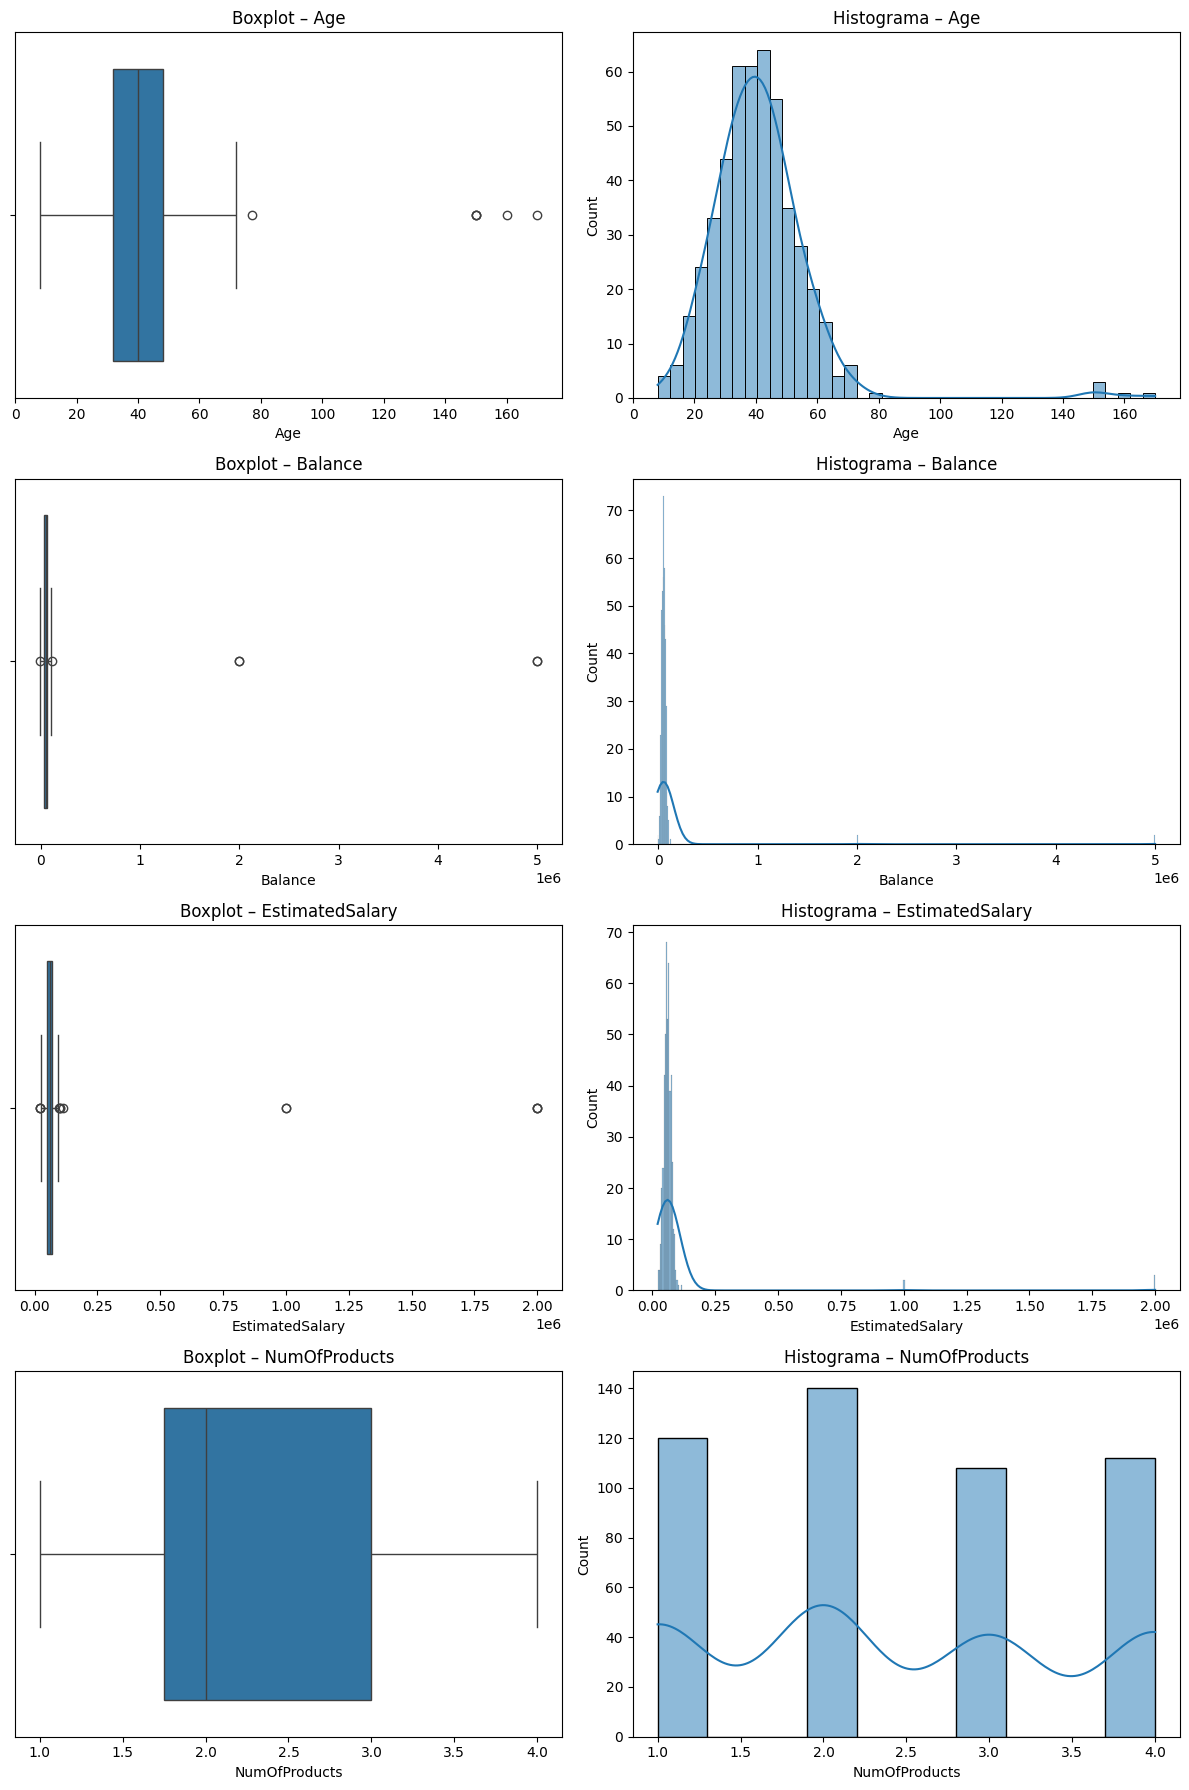

In [ ]:
num_vars = ['Age', 'Balance', 'EstimatedSalary', 'NumOfProducts']

# Gráficas lado a lado
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 18))
for i, var in enumerate(num_vars):
    # Boxplot
    sns.boxplot(x=df[var], ax=axes[i,0])
    axes[i,0].set_title(f'Boxplot – {var}')
    # Histograma
    sns.histplot(df[var].dropna(), kde=True, ax=axes[i,1])
    axes[i,1].set_title(f'Histograma – {var}')
plt.tight_layout()
plt.show()


3


In [ ]:
num_cols = ['Age','CreditScore','Balance','Tenure',
            'NumOfProducts','EstimatedSalary',
            'HasCrCard','IsActiveMember']      # todas numéricas
cat_cols = ['Gender']                          # categórica binaria



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# a) Numéricas → imputar MEDIANA
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler' , StandardScaler())
])

# b) Categórica → imputar MODA + One-Hot
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot' , OneHotEncoder(drop='if_binary'))
])

# c) Unir todo
preprocess = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])


In [ ]:
X = preprocess.fit_transform(df)
feature_names = num_cols + list(
        preprocess.named_transformers_['cat']['onehot']
                  .get_feature_names_out(cat_cols)
)

import pandas as pd
df_scaled = pd.DataFrame(X, columns=feature_names)


In [ ]:
X = preprocess.fit_transform(df)
print("Shape de X:", X.shape)

import pandas as pd
feature_names = num_cols + list(
        preprocess.named_transformers_['cat']['onehot']
                 .get_feature_names_out(cat_cols)
)
df_scaled = pd.DataFrame(X, columns=feature_names)
display(df_scaled.head())
display(df_scaled.describe().round(2))
print("NaNs restantes por columna:\n", df_scaled.isna().sum())


Shape de X: (500, 9)


,Age,CreditScore,Balance,Tenure,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Gender_M
0,0.174083,-0.008821,-0.109400,-1.541176,-1.315239,-0.117814,-0.847475,-1.156049,1.0
1,1.325747,-0.021587,-0.052647,-1.541176,1.455630,0.007189,1.179976,0.865015,1.0
2,0.598380,1.503926,-0.022829,-0.922478,-0.391616,-0.057099,-0.847475,0.865015,0.0
3,-0.492670,0.099688,-0.051660,1.242964,-1.315239,-0.110757,-0.847475,-1.156049,0.0
4,-0.735125,0.437982,-0.126868,-0.613130,0.532007,-0.153967,1.179976,-1.156049,1.0


,Age,CreditScore,Balance,Tenure,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Gender_M
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.56
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.50
min,-2.01,-1.73,-0.26,-1.54,-1.32,-0.34,-0.85,-1.16,0.00
25%,-0.55,-0.88,-0.12,-0.92,-0.39,-0.15,-0.85,-1.16,0.00
50%,-0.07,-0.01,-0.08,0.01,-0.39,-0.09,-0.85,0.87,1.00
75%,0.42,0.87,-0.04,0.93,0.53,-0.04,1.18,0.87,1.00
max,7.81,1.76,14.66,1.55,1.46,11.92,1.18,0.87,1.00


NaNs restantes por columna:
 Age                0
CreditScore        0
Balance            0
Tenure             0
NumOfProducts      0
EstimatedSalary    0
HasCrCard          0
IsActiveMember     0
Gender_M           0
dtype: int64


4

**bold text**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
Ks          = range(2, 16)
inertias    = []
sil_scores  = []

for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertias.append(km.inertia_)    # suma de distancias al centroide
    sil_scores.append(silhouette_score(X, km.labels_))


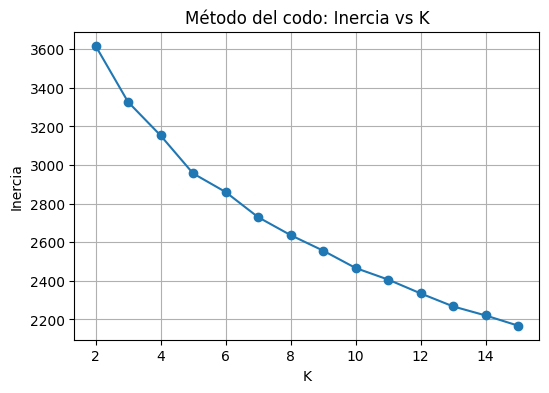

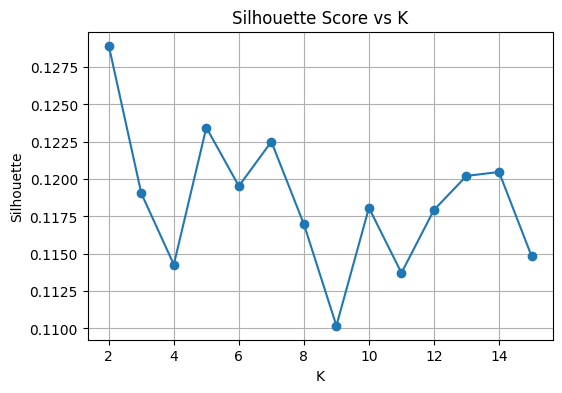

In [ ]:
# --kjk- Gráfico 1: inercia vs K
plt.figure(figsize=(6,4))
plt.plot(Ks, inertias, 'o-')
plt.title('Método del codo: Inercia vs K')
plt.xlabel('K'); plt.ylabel('Inercia'); plt.grid(True)
plt.show()

# --- Gráfico 2: silhouette vs K ---
plt.figure(figsize=(6,4))
plt.plot(Ks, sil_scores, 'o-')
plt.title('Silhouette Score vs K')
plt.xlabel('K'); plt.ylabel('Silhouette'); plt.grid(True)
plt.show()


5


In [ ]:
# 1
K_star = 5
km_final = KMeans(n_clusters=K_star, random_state=42, n_init=10)
df['Cluster'] = km_final.fit_predict(X)        # X es la matriz escalada


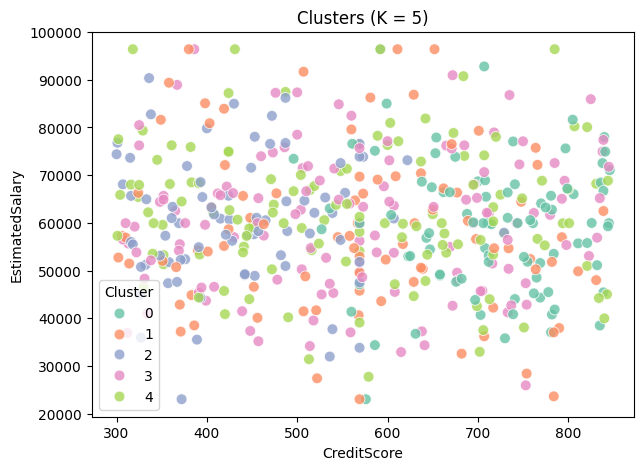

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='CreditScore', y='EstimatedSalary',
                hue='Cluster', palette='Set2', s=60, alpha=0.8)
plt.title('Clusters (K = 5)')
plt.show()


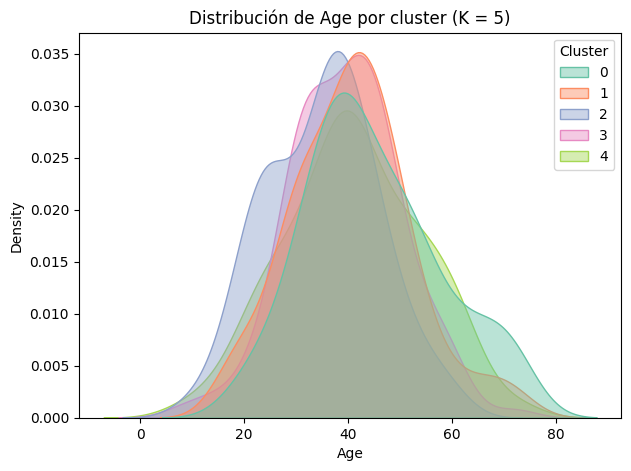

In [ ]:
plt.figure(figsize=(7,5))
sns.kdeplot(data=df, x='Age', hue='Cluster',
            fill=True, common_norm=False, alpha=0.45, palette='Set2')
plt.title('Distribución de Age por cluster (K = 5)')
plt.xlabel('Age')
plt.show()


In [ ]:
num_cols = ['Age','CreditScore','Balance','Tenure',
            'NumOfProducts','EstimatedSalary',
            'HasCrCard','IsActiveMember']

summary = (df.groupby('Cluster')[num_cols]
             .agg(['median','std'])
             .round(2))

display(summary)


Age        CreditScore           Balance           Tenure        \
        median    std      median     std    median       std median   std   
Cluster                                                                      
0         42.0  12.89       715.0   88.43  49104.70  19526.64    5.0  3.41   
1         40.0  11.54       569.0  148.78  52277.59  19751.17    4.0  3.33   
2         36.0  10.70       429.0   92.72  51992.33  20733.20    4.5  3.67   
3         40.0  10.70       564.5  152.49  52277.59  19152.26    5.0  3.27   
4         40.5  13.11       561.0  156.05  53666.52  19454.56    5.0  3.35   

        NumOfProducts       EstimatedSalary           HasCrCard       \
               median   std          median       std    median  std   
Cluster                                                                
0                 2.0  1.01        59941.14  12902.96       0.0  0.0   
1                 2.0  1.12        56623.50  16714.38       1.0  0.0   
2                 2.0  1.11        60797.74  13793.22       0.0  0.0   
3                 2.0  1.06        59951.97  14242.13       0.0  0.0   
4                 2.0  1.12        60447.54  13826.33       1.0  0.0   

        IsActiveMember        
                median   std  
Cluster                       
0                  1.0  0.12  
1                  0.0  0.00  
2                  1.0  0.00  
3                  0.0  0.00  
4                  1.0  0.00